Veer Khosla

CS 251: Data Analysis and Visualization

Fall 2023

Project 5: Clustering

In [10]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)


# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a. Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [11]:
from matplotlib.image import imread

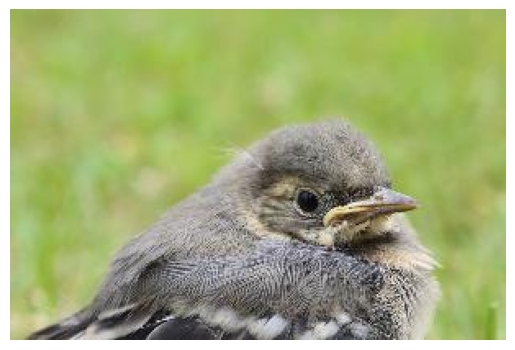

In [12]:
baby_bird_image = imread('data/baby_bird.jpg')

plt.imshow(baby_bird_image)
plt.axis('off')
plt.show()

### 2b. Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [13]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    num_rows, num_cols, rgb = img.shape    
    flattened_img = img.reshape(num_rows * num_cols, rgb)
    
    return flattened_img

In [14]:
baby_bird_flattened = flatten(baby_bird_image)
print(baby_bird_flattened.shape)

(61206, 3)


### 2c. Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [15]:
np.random.seed(0)

k=50
bird_image = kmeans.KMeans(baby_bird_flattened)
bird_image_init_centroids = bird_image.initialize(k)
bird_image_new_labels = bird_image.update_labels(bird_image_init_centroids)
bird_image_new_centroids, bird_image_diff_from_prev_centroids = bird_image.update_centroids(k, bird_image_new_labels, bird_image_init_centroids)
bird_image.cluster(k=k, max_iter=20)
bird_image.replace_color_with_centroid()

### 2d. Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

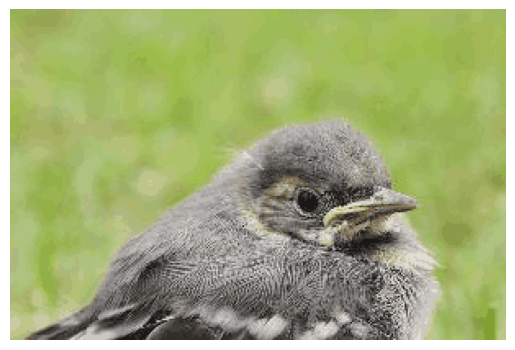

In [16]:
compressed_image_reshaped = np.reshape(bird_image.data, baby_bird_image.shape)
plt.imshow(compressed_image_reshaped)
plt.axis('off')
plt.show()

### 2e. Run K-means and compress an image of your choice

Smaller images run a lot faster.

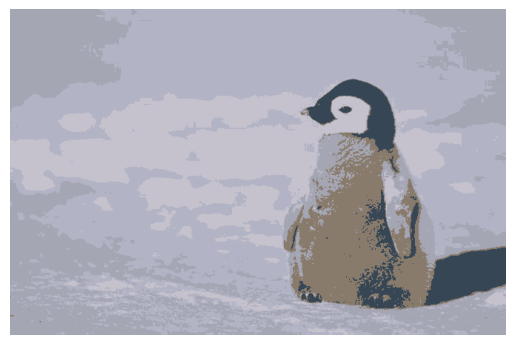

In [17]:
peng_img = imread('data/lilpenguin.jpeg')
peng_flattened_img = flatten(peng_img)
np.random.seed(0)

k=5
peng = kmeans.KMeans(peng_flattened_img)
peng_init_centroids = peng.initialize(k)
peng_new_labels = peng.update_labels(peng_init_centroids)
peng_new_centroids, peng_diff_from_prev_centroids = peng.update_centroids(k, peng_new_labels, peng_init_centroids)
peng.cluster(k=k, max_iter=20)
peng.replace_color_with_centroid()
peng_compressed_image_reshaped = np.reshape(peng.data, peng_img.shape)
plt.imshow(peng_compressed_image_reshaped)
plt.axis('off')
plt.show()

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space (i.e. compression ratio) required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.

### 7) Neural Gas algorithm

- Implement the Neural Gas algorithm and compare clustering results and runtime with K-means on datasets of your choice.

### 8) K-means++

- Research and implement the K-means++ algorithm for initializing the centroids in K-means.